<a href="https://colab.research.google.com/github/RamziZayed97/University/blob/main/Untitled12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
# loading the dataset
file_path = 'heart.csv'
heart_data = pd.read_csv(file_path)

In [ ]:
#display details of each attributes
attributes_details = heart_data.describe(include='all').transpose()

In [ ]:
#display min, max, mean, and standard deviation for numerical attributes
numerical_attributes = attributes_details[attributes_details['count'].notnull()]
numerical_details = numerical_attributes[['min', 'max', 'mean', 'std']]
print("\nNumerical Attributes Details: ")
print(numerical_details)


Numerical Attributes Details: 
            min    max        mean        std
age        29.0   77.0   54.433333   9.037208
sex         0.0    1.0    0.683168   0.466011
cp          0.0    3.0    0.966997   1.032052
trtbps     94.0  200.0  131.699647  17.937586
chol      126.0  564.0  246.346021  52.764525
fbs         0.0    1.0    0.149153   0.356844
restecg     0.0    2.0    0.526490   0.526027
thalachh   71.0  202.0  148.542125  23.164038
exng        0.0    1.0    0.327815   0.470196
oldpeak     0.0    6.2    1.046667   1.163760
slp         0.0    2.0    1.391892   0.617651
caa         0.0    4.0    0.728477   1.024184
thall       0.0    3.0    2.320819   0.618889
output      0.0    1.0    0.536082   0.499555


In [ ]:
#Display count of each possible value for nominal attributes
nominal_attributes = attributes_details[attributes_details['count'].isnull()]
nominal_details = heart_data[nominal_attributes.index].apply(lambda x: x.value_counts())
print('\nNominal Attributes Details: ')
print(nominal_details)


Nominal Attributes Details: 
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[303 rows x 0 columns]


In [ ]:
missing_data = heart_data.isnull().sum()
print("\nMissing Data: ")
print(missing_data)

#display categories of the class
class_categories = heart_data['output'].value_counts()
print("\nCategories of the class: ")
print(class_categories)

#Number of instances (rows)
num_instances = len(heart_data)
print("\nNumber of instances (rows): ", num_instances)


Missing Data: 
age          3
sex          0
cp           0
trtbps      20
chol        14
fbs          8
restecg      1
thalachh    30
exng         1
oldpeak      3
slp          7
caa          1
thall       10
output      12
dtype: int64

Categories of the class: 
output
1.0    156
0.0    135
Name: count, dtype: int64

Number of instances (rows):  303


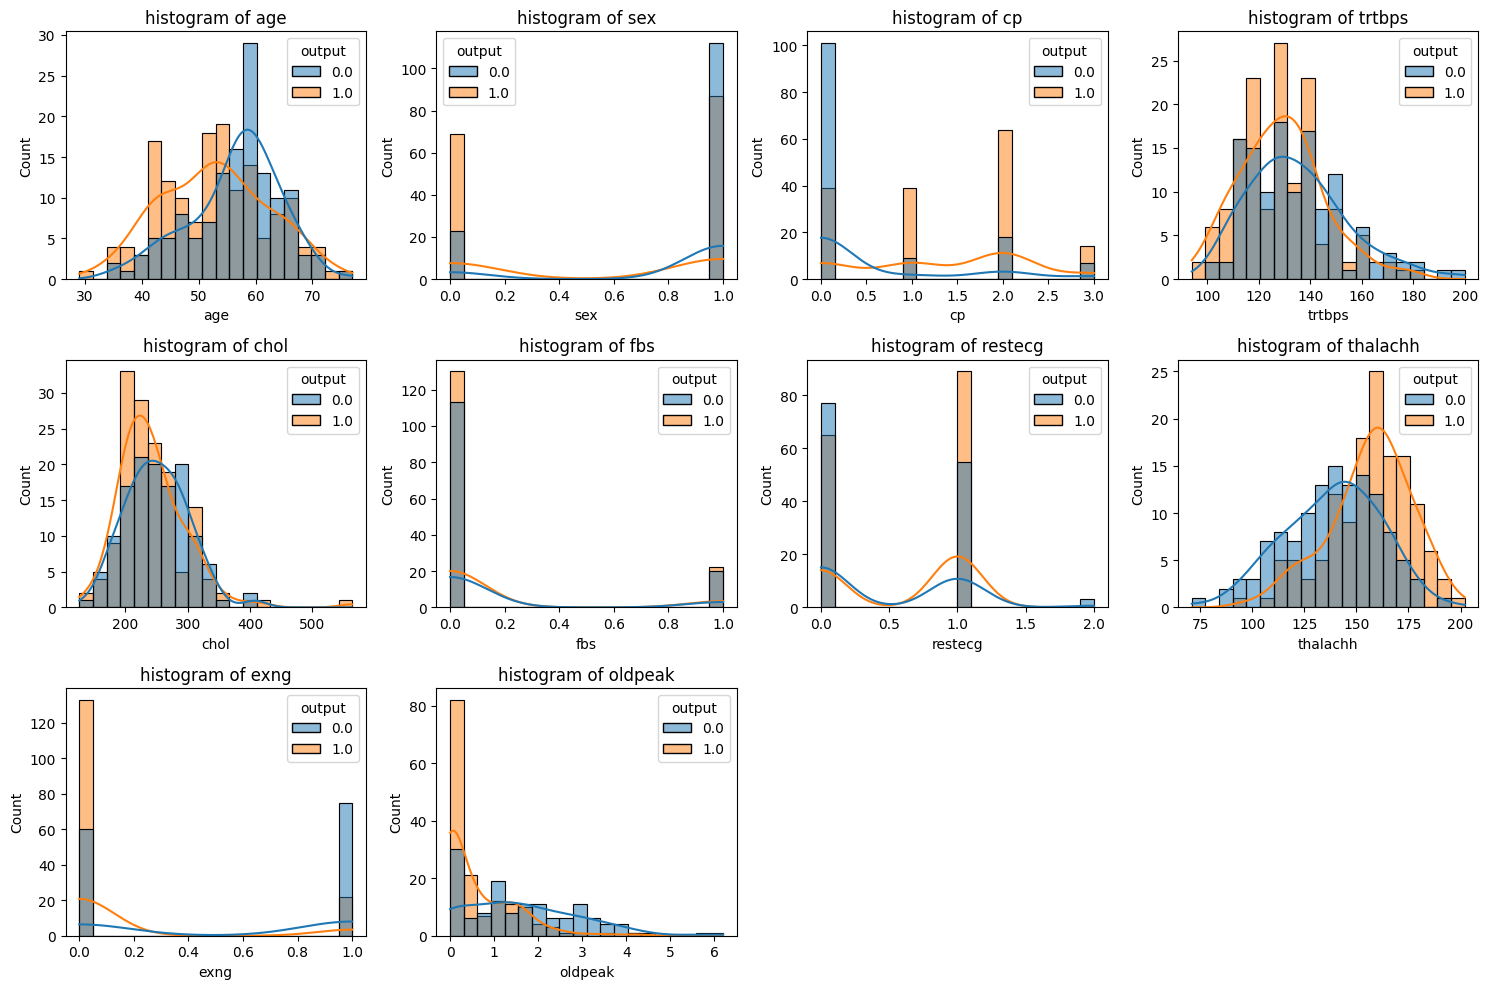

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

all_attributes = heart_data.columns
selected_attributes = all_attributes[:10]

plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_attributes):
  plt.subplot(3, 4, i+1)
  sns.histplot(data=heart_data, x=column, hue="output", bins=20, kde=True)
  plt.title(f"histogram of {column}")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset
path = 'heart.csv'
data = pd.read_csv(path)

# Handle missing values
# Let's use SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encode categorical variables
X = data_imputed.drop('output', axis=1)
y = data_imputed['output']

# Convert y to integer labels
y = y.astype(int)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier with the integer labels
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.819672131147541
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.83      0.81      0.82        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
print(y_train[:10])

132    1.0
202    0.0
196    0.0
75     1.0
176    0.0
59     1.0
93     1.0
6      1.0
177    0.0
30     1.0
Name: output, dtype: float64


In [ ]:
missing_values = data.isnull().sum()

# Remove rows with missing values
data_cleaned = data.dropna()

In [ ]:
missing_values = data_cleaned.isnull().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


#preprocessing
X = data_cleaned.drop('output', axis =1) #features
y = data_cleaned['output']

#splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Initialize the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

#train the classifier
mlp_classifier.fit(X_train, y_train)

#predict on the test set
y_pred_mlp = mlp_classifier.predict(X_test)

#evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Accuracy (Neural Network - MLP): {accuracy_mlp}')
print(classification_report(y_test, y_pred_mlp))

Accuracy (Neural Network - MLP): 0.8604651162790697
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87        24
         1.0       0.81      0.89      0.85        19

    accuracy                           0.86        43
   macro avg       0.86      0.86      0.86        43
weighted avg       0.87      0.86      0.86        43



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
knn_classifier = KNeighborsClassifier()
svc_classifier = SVC()
gb_classifier = GradientBoostingClassifier()

# List of classifiers
classifiers = [
    ("Random Forest", rf_classifier),
    ("MLP Classifier", mlp_classifier),
    ("K-Nearest Neighbors", knn_classifier),
    ("Support Vector Machine", svc_classifier),
    ("Gradient Boosting", gb_classifier)
]

# Evaluate and compare classifiers
for name, classifier in classifiers:
    scores = cross_val_score(classifier, X, y, cv=5)
    print(f"{name}:")
    print("Cross-validated Accuracy:", scores.mean())


Random Forest:
Cross-validated Accuracy: 0.8128460686600221


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP Classifier:
Cross-validated Accuracy: 0.7662236987818384
K-Nearest Neighbors:
Cross-validated Accuracy: 0.6400885935769657
Support Vector Machine:
Cross-validated Accuracy: 0.663233665559247
Gradient Boosting:
Cross-validated Accuracy: 0.7847176079734219
